In [1]:
from pynwb import NWBHDF5IO
import numpy as np
import os

import matplotlib.pyplot as plt

# Get the absolute path of the current file
current_file_path = os.path.dirname(os.getcwd())

# Path to your NWB file
file_path = os.path.join(current_file_path, 'test/Screening/572_Screening/Experiment-2/nwb/ecephys.nwb')

raw_io = NWBHDF5IO(file_path, "r")
nwb_in = raw_io.read()


/opt/miniconda3/envs/nwbPipeline/lib/python3.8/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/opt/miniconda3/envs/nwbPipeline/lib/python3.8/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/opt/miniconda3/envs/nwbPipeline/lib/python3.8/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  return func(args[0], **pargs)


In [2]:
nwb_in

,x,y,z,location,group,group_name,label
id,,,,,,,
0,111.0,111.0,111.0,RA,GA1 pynwb.ecephys.ElectrodeGroup at 0x4925466992\nFields:\n description: electrode group for GA1\n device: array pynwb.device.Device at 0x4925323200\nFields:\n description: Neuralynx Pegasus\n manufacturer: Neuralynx\n\n location: RA\n,GA1,RA1
1,111.0,111.0,111.0,REC,GA2 pynwb.ecephys.ElectrodeGroup at 0x4925465936\nFields:\n description: electrode group for GA2\n device: array pynwb.device.Device at 0x4925323200\nFields:\n description: Neuralynx Pegasus\n manufacturer: Neuralynx\n\n location: REC\n,GA2,REC1
2,111.0,111.0,111.0,RAH,GA3 pynwb.ecephys.ElectrodeGroup at 0x4925467184\nFields:\n description: electrode group for GA3\n device: array pynwb.device.Device at 0x4925323200\nFields:\n description: Neuralynx Pegasus\n manufacturer: Neuralynx\n\n location: RAH\n,GA3,RAH1
3,111.0,111.0,111.0,LFO,macro pynwb.ecephys.ElectrodeGroup at 0x4925467280\nFields:\n description: electrode group for macro\n device: array pynwb.device.Device at 0x4925323200\nFields:\n description: Neuralynx Pegasus\n manufacturer: Neuralynx\n\n location: LFO\n,macro,LFO1
,x,y,z,location,group,group_name,label
id,,,,,,,
0,111.0,111.0,111.0,RA,GA1 pynwb.ecephys.ElectrodeGroup at 0x4925466992\nFields:\n description: electrode group for GA1\n device: array pynwb.device.Device at 0x4925323200\nFields:\n description: Neuralynx Pegasus\n manufacturer: Neuralynx\n\n location: RA\n,GA1,RA1
1,111.0,111.0,111.0,REC,GA2 pynwb.ecephys.ElectrodeGroup at 0x4925465936\nFields:\n description: electrode group for GA2\n device: array pynwb.device.Device at 0x4925323200\nFields:\n description: Neuralynx Pegasus\n manufacturer: Neuralynx\n\n location: REC\n,GA2,REC1
2,111.0,111.0,111.0,RAH,GA3 pynwb.ecephys.ElectrodeGroup at 0x4925467184\nFields:\n description: electrode group for GA3\n device: array pynwb.device.Device at 0x4925323200\nFields:\n description: Neuralynx Pegasus\n manufacturer: Neuralynx\n\n location: RAH\n,GA3,RAH1


In [3]:
nwb_in.electrodes

,x,y,z,location,group,group_name,label
id,,,,,,,
0,111.0,111.0,111.0,RA,GA1 pynwb.ecephys.ElectrodeGroup at 0x4925466992\nFields:\n description: electrode group for GA1\n device: array pynwb.device.Device at 0x4925323200\nFields:\n description: Neuralynx Pegasus\n manufacturer: Neuralynx\n\n location: RA\n,GA1,RA1
1,111.0,111.0,111.0,REC,GA2 pynwb.ecephys.ElectrodeGroup at 0x4925465936\nFields:\n description: electrode group for GA2\n device: array pynwb.device.Device at 0x4925323200\nFields:\n description: Neuralynx Pegasus\n manufacturer: Neuralynx\n\n location: REC\n,GA2,REC1
2,111.0,111.0,111.0,RAH,GA3 pynwb.ecephys.ElectrodeGroup at 0x4925467184\nFields:\n description: electrode group for GA3\n device: array pynwb.device.Device at 0x4925323200\nFields:\n description: Neuralynx Pegasus\n manufacturer: Neuralynx\n\n location: RAH\n,GA3,RAH1
3,111.0,111.0,111.0,LFO,macro pynwb.ecephys.ElectrodeGroup at 0x4925467280\nFields:\n description: electrode group for macro\n device: array pynwb.device.Device at 0x4925323200\nFields:\n description: Neuralynx Pegasus\n manufacturer: Neuralynx\n\n location: LFO\n,macro,LFO1


In [4]:
# create a list of electrodes:
list(nwb_in.electrodes.label) 

['RA1', 'REC1', 'RAH1', 'LFO1', 'LFO2', 'LFO3']

In [20]:
list(nwb_in.processing['ecephys']['microLFP']['ElectricalSeries'].electrodes['label'])

['RA1', 'REC1', 'RAH1', 'LFO1', 'LFO2', 'LFO3']

In [23]:
list(nwb_in.processing['ecephys']['macroLFP']['ElectricalSeries'].electrodes['label'])

['RA1', 'REC1', 'RAH1', 'LFO1', 'LFO2', 'LFO3']

In [26]:
list(nwb_in.processing['ecephys']['macroLFP']['ElectricalSeries'].electrodes)

[        x      y      z location  \
 id                                 
 3   111.0  111.0  111.0      LFO   
 
                                                 group group_name label  
 id                                                                      
 3   macro pynwb.ecephys.ElectrodeGroup at 0x492546...      macro  LFO1  ,
         x      y      z location  \
 id                                 
 4   111.0  111.0  111.0      LFO   
 
                                                 group group_name label  
 id                                                                      
 4   macro pynwb.ecephys.ElectrodeGroup at 0x492546...      macro  LFO2  ,
         x      y      z location  \
 id                                 
 5   111.0  111.0  111.0      LFO   
 
                                                 group group_name label  
 id                                                                      
 5   macro pynwb.ecephys.ElectrodeGroup at 0x492546...      macro  

(317885, 3)

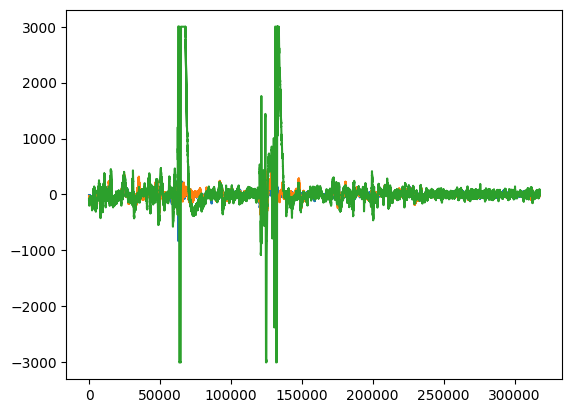

In [5]:
# load LFP:
microLFP = np.array(nwb_in.processing['ecephys']['microLFP']['ElectricalSeries'].data)
plt.plot(microLFP)
display(microLFP.shape)

(317883, 3)

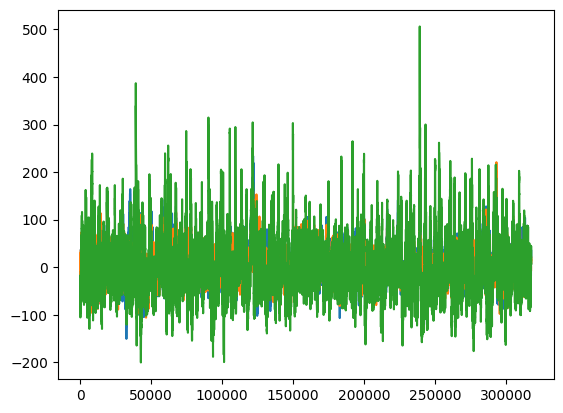

In [6]:
macroLFP = np.array(nwb_in.processing['ecephys']['macroLFP']['ElectricalSeries'].data)
plt.plot(macroLFP)
display(macroLFP.shape)

dict_keys(['RA1', 'REC1', 'RAH1'])

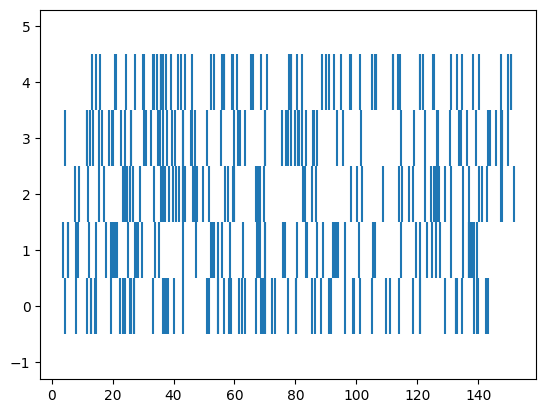

In [7]:
# load spikes:
from collections import defaultdict
spikes = defaultdict(list)

for spike_times, electrodes in zip(nwb_in.units['spike_times'], nwb_in.units['electrodes']):
    spikes[list(electrodes.label)[0]].append(spike_times)

display(spikes.keys())
spikes_ra1 = spikes['RA1'][1]
np.random.shuffle(spikes_ra1)
plt.eventplot(spikes_ra1.reshape((5,70)), 'horizontal')

dict_keys(['RA1', 'REC1', 'RAH1'])

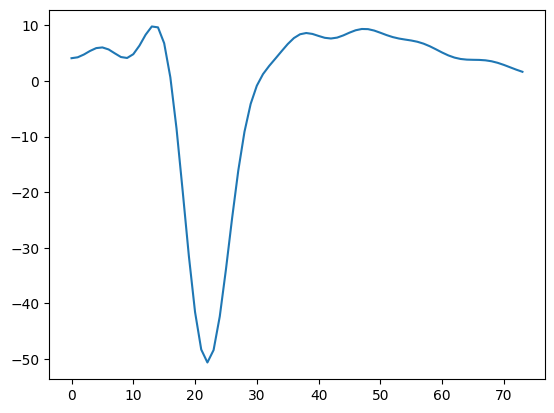

In [8]:
# load average waveforms:
from collections import defaultdict
waveform_mean = defaultdict(list)

for waveform, electrodes in zip(nwb_in.units['waveform_mean'], nwb_in.units['electrodes']):
    waveform_mean[list(electrodes.label)[0]].append(waveform)

display(waveform_mean.keys())
plt.plot(waveform_mean['RA1'][1])